### ARIMA MODEL

In [10]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('Economic_climate_data_2001_2018.csv')
data.head()

NUTS_ID  Year  apara_median_sum  heat_wave_count_sum  \
0      AD  2001          4.664714                  0.0   
1      AD  2002          4.664714                  0.0   
2      AD  2003          4.664714                  0.0   
3      AD  2004          4.664714                  0.0   
4      AD  2005          4.664714                  0.0   

   aggregate_heat_intensity_median_sum  low_flow_index_monthly_max_sum  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   

   soil_moisture_anomaly_median_sum  spi_01_median_sum  spi_03_median_sum  \
0                            -3.416                0.0                0.0   
1                             0.111                0.0                0.0   
2                             6.168                0.0                0.0   
3                            -2.651                0.0                0.0   
4                           -14.481                0.0                0.0   

   spi_06_median_sum  ...  spi_03_median_mean  spi_06_median_mean  \
0                0.0  ...                 0.0                 0.0   
1                0.0  ...                 0.0                 0.0   
2                0.0  ...                 0.0                 0.0   
3                0.0  ...                 0.0                 0.0   
4                0.0  ...                 0.0                 0.0   

   spi_12_median_mean  temp_max_median_mean  employment  sector  \
0                 0.0                   NaN         NaN     NaN   
1                 0.0                   NaN         NaN     NaN   
2                 0.0                   NaN         NaN     NaN   
3                 0.0                   NaN         NaN     NaN   
4                 0.0                   NaN         NaN     NaN   

   gross value added  area  gdp  population  
0                NaN   NaN  NaN         NaN  
1                NaN   NaN  NaN         NaN  
2                NaN   NaN  NaN         NaN  
3                NaN   NaN  NaN         NaN  
4                NaN   NaN  NaN         NaN  

[5 rows x 28 columns]

### Correlation Analysis

In [20]:
# Consider only numeric columns for correlation analysis (excluding 'Year' and 'NUTS_ID')
numeric_data = data.select_dtypes(include=[float, int])
numeric_data = numeric_data.drop(['Year'], axis=1)

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on correlations with 'gross value added' and 'gdp'
gva_correlations = correlation_matrix['gross value added'].sort_values(ascending=False)

gva_correlations

gross value added                       1.000000
employment                              0.724989
gdp                                     0.517348
population                              0.469578
low_flow_index_monthly_max_sum          0.065345
low_flow_index_monthly_max_mean         0.042878
area                                    0.039193
apara_median_mean                       0.020644
apara_median_sum                        0.012925
temp_max_median_mean                    0.007312
temp_max_median_sum                     0.003271
spi_01_median_sum                      -0.009876
spi_01_median_mean                     -0.009876
spi_03_median_mean                     -0.016847
spi_03_median_sum                      -0.016847
spi_06_median_mean                     -0.018968
spi_06_median_sum                      -0.018968
aggregate_heat_intensity_median_mean   -0.019558
aggregate_heat_intensity_median_sum    -0.019558
spi_12_median_sum                      -0.019946
spi_12_median_mean  

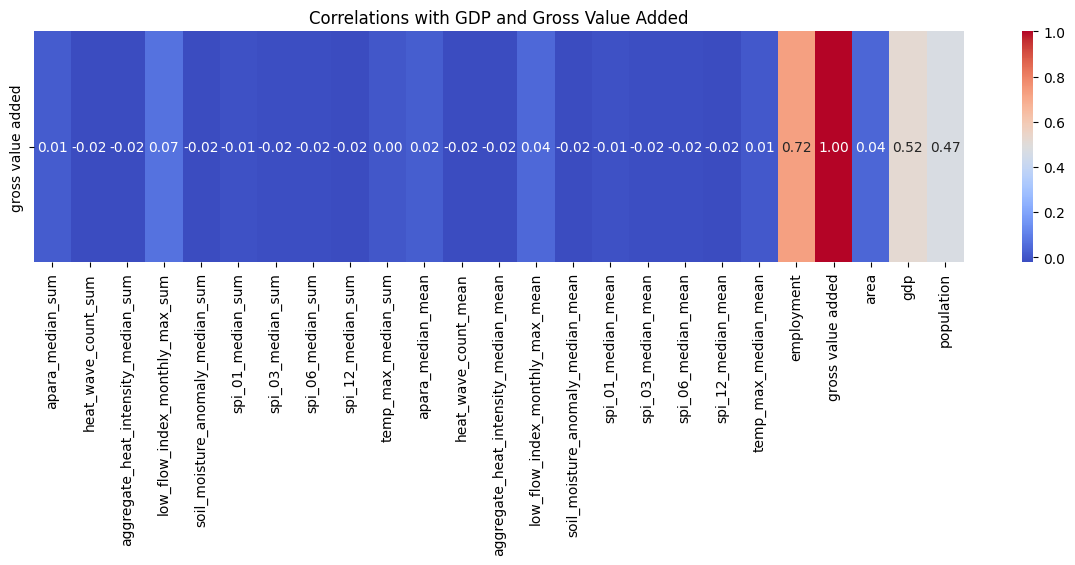

In [19]:
# Select the 'gdp' and 'gross value added' correlations
selected_correlations = correlation_matrix.loc[['gross value added'], :]

# Create a heatmap of the selected correlations
plt.figure(figsize=(15, 3))  # Set the figure size
sns.heatmap(selected_correlations, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlations with GDP and Gross Value Added')

# Show the plot
plt.show()

### ARIMAX

In [8]:
# Filter the dataset for relevant columns
relevant_data = data[['NUTS_ID', 'Year', 'gross value added', 'gdp']]

# Drop rows with missing values for 'gross value added' and 'gdp' to simplify the example
# In a more thorough analysis, you might want to consider filling these missing values appropriately
relevant_data = relevant_data.dropna(subset=['gross value added', 'gdp'])

# Get a list of unique regions
regions = relevant_data['NUTS_ID'].unique()

# Example: Model for the first two regions (for demonstration purposes)
example_regions = regions[:2]  # Adjust this to model more regions

# Placeholder for ARIMA model results
arima_results = {}

# Loop through each region and fit ARIMA models for 'gross value added' and 'GDP'
for region in example_regions:
    region_data = relevant_data[relevant_data['NUTS_ID'] == region].sort_values('Year')

    # ARIMA model for 'gross value added'
    gva_model = ARIMA(region_data['gross value added'], order=(1,1,1))  # Example parameters (1,1,1)
    gva_results = gva_model.fit()

    # ARIMA model for 'GDP'
    gdp_model = ARIMA(region_data['gdp'], order=(1,1,1))  # Example parameters (1,1,1)
    gdp_results = gdp_model.fit()

    # Store the results
    arima_results[region] = {'gva_model': gva_results, 'gdp_model': gdp_results}

# Display summary of the ARIMA model for the first region
arima_results[example_regions[0]]['gva_model'].summary(), arima_results[example_regions[0]]['gdp_model'].summary()

/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/python_hackathon_3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/python_hackathon_3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/python_hackathon_3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/python_hackathon_3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting au

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:      gross value added   No. Observations:                   34
 Model:                 ARIMA(1, 1, 1)   Log Likelihood                -119.574
 Date:                Wed, 15 Nov 2023   AIC                            245.149
 Time:                        11:06:15   BIC                            249.638
 Sample:                             0   HQIC                           246.659
                                  - 34                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.9968      0.010   -102.304      0.000      -1.016      -0.978
 ma.L1          0.1408      0.234      0.602      0.547      -0.318   